1. Binary Classification

  이진 분류 점들을 표현한 그래프를 보면 S자로 표현된다. 따라서 가설은 H(x) = f(Wx+b)의 어떤 함수 f를 사용한다.

2. Sigmoid Function

  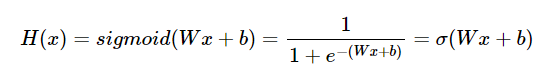

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

- W = 1, b = 0

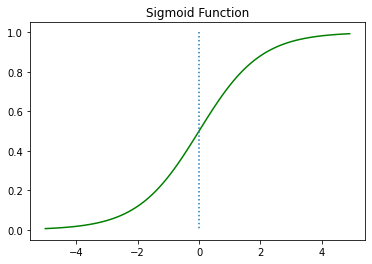

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

- w값 변화에 따른 경사도 변화

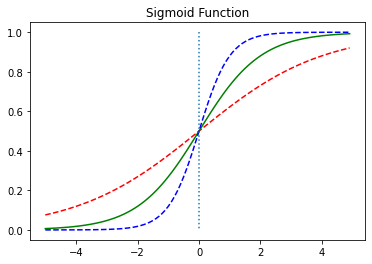

In [ ]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r',linestyle = '--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle = '--')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid Function')
plt.show()

- b값 변화에 따른 좌우 이동

- 시그모이드 함수를 이용한 분류

  0과 1 사이의 값을 가짐 -> 분류 작업 : 0.5 이상이면 1(True)

3. Cost Function

  Mean Square Error를 로지스틱 회귀의 비용함수로 사용한다면 non-convex 형태의 그래프가 나온다. 따라서 글로벌 미니멈이 아닌 로컬 미니멈에 빠질 가능성이 있다. 

  시그모이드 함수의 특징은 함수의 출력값이 0과 1사이라는 점이기 때문에 실제값이 1일때 예측값이 0에 가까워지면 오차가 커져야 하며 실제값이 0일 때 예측값이 1에 가까워지면 오차가 커져야 한다.

  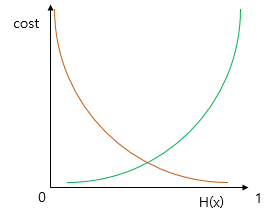

  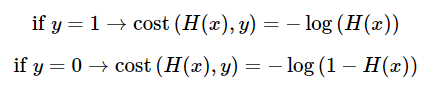

  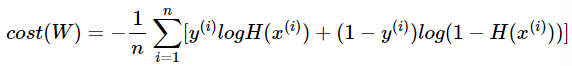

4. PyTorch로 Logistic regression 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1),requires_grad = True) # size = 2 x 1 -> x_train이 6 x 2이므로
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b],lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  
  # h = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))
  h = torch.sigmoid(x_train.matmul(W)+b)

  losses = -(y_train * torch.log(h) + (1-y_train) * torch.log(1-h))
  cost = losses.mean()
  # F.binary_craoss_entropy(h,y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
      epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


5. nn.Module로 구현하는 로지스틱 회귀



In [ ]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

h = model(x_train)
cost = F.binary_cross_entropy(h,y_train)

6. class로 구현

In [ ]:
class BinaryClassifier(nn.Module):
  def __init(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.linear(x))